# $\mathrm{CH_3COCH_3}$ (Acetone)

In [1]:
using Pkg 
Pkg.activate("../")

  Activating project at `~/gitrepos/activepure/Photolysis.jl/mcm`


In [2]:
using Plots, MLPlotRecipes
using HDF5
using Tables, DataFrames, CSV
using MLJ, MLJGaussianProcesses
using StatsBase 
using KernelFunctions
using ParameterHandling

In [3]:
include("./utils.jl")

filter_outliers (generic function with 1 method)

In [4]:
# load in spectrometer data
hr4000_df = CSV.File("../hr4000_wavelengths.txt") |> DataFrame ; 

In [6]:
data = [
279	0.195708753	0.423710138	0.619418891
279.5	0.190550934	0.419531874	0.610082808
280	0.185497696	0.415228571	0.600726267
280.5	0.180548576	0.410807386	0.591355962
281	0.175703014	0.406275515	0.58197853
281.5	0.170960367	0.401640167	0.572600534
282	0.166319906	0.396908544	0.56322845
282.5	0.161780823	0.392087825	0.553868648
283	0.157342237	0.387185144	0.544527381
283.5	0.1530032	0.382207571	0.53521077
284	0.148762696	0.377162097	0.525924793
284.5	0.144619651	0.372055619	0.51667527
285	0.140572936	0.36689492	0.507467856
285.5	0.136621369	0.361686661	0.498308031
286	0.132763723	0.356437364	0.489201087
286.5	0.128998727	0.351153399	0.480152126
287	0.125325072	0.345840978	0.47116605
287.5	0.121741413	0.340506143	0.462247556
288	0.118246375	0.335154755	0.45340113
288.5	0.114838555	0.329792489	0.444631044
289	0.111516526	0.324424829	0.435941355
289.5	0.108278841	0.319057057	0.427335898
290	0.105124034	0.313694255	0.41881829
290.5	0.102050627	0.308341298	0.410391924
291	0.099057127	0.303002849	0.402059976
291.5	0.096142035	0.297683364	0.393825399
292	0.093303845	0.292387084	0.38569093
292.5	0.090541049	0.287118041	0.377659089
293	0.087852134	0.281880052	0.369732185
293.5	0.085235591	0.276676727	0.361912317
294	0.082689913	0.271511466	0.354201378
294.5	0.080213598	0.266387464	0.346601062
295	0.077805151	0.261307713	0.339112864
295.5	0.075463087	0.256275006	0.331738092
296	0.073185927	0.25129194	0.324477867
296.5	0.070972207	0.246360923	0.31733313
297	0.068820476	0.241484175	0.310304651
297.5	0.066729295	0.236663736	0.303393031
298	0.064697242	0.23190147	0.296598712
298.5	0.06272291	0.22719907	0.28992198
299	0.060804912	0.222558065	0.283362976
299.5	0.058941875	0.217979825	0.2769217
300	0.057132448	0.213465567	0.270598015
300.5	0.0553753	0.209016361	0.264391661
301	0.053669118	0.204633136	0.258302254
301.5	0.052012611	0.200316688	0.252329299
302	0.050404509	0.196067682	0.24647219
302.5	0.048843563	0.190919734	0.239763298
303	0.047328549	0.176499978	0.223828527
303.5	0.045858261	0.162944281	0.208802542
304	0.044431518	0.150238624	0.194670142
304.5	0.043047161	0.138362687	0.181409848
305	0.041704055	0.127290937	0.168994992
305.5	0.040401085	0.11699367	0.157394755
306	0.039137162	0.107437973	0.146575134
306.5	0.037911217	0.098588606	0.136499824
307	0.036722207	0.090408794	0.127131001
307.5	0.035569109	0.082860907	0.118430016
308	0.034450924	0.075907066	0.11035799
308.5	0.033366675	0.069509635	0.10287631
309	0.032315408	0.063631641	0.09594705
309.5	0.03129619	0.058237106	0.089533297
310	0.030308112	0.053291308	0.083599419
310.5	0.029350283	0.048760978	0.078111261
311	0.028421838	0.044614443	0.073036281
311.5	0.02752193	0.040821716	0.068343645
312	0.026649733	0.03735455	0.064004283
312.5	0.025804444	0.034186452	0.059990896
313	0.024985278	0.031292679	0.056277957
313.5	0.02419147	0.028650197	0.052841668
314	0.023422277	0.02623764	0.049659918
314.5	0.022676973	0.02403524	0.046712213
315	0.021954852	0.022024759	0.04397961
315.5	0.021255225	0.020189407	0.041444632
316	0.020577424	0.01851376	0.039091185
316.5	0.019920798	0.016983679	0.036904476
317	0.019284711	0.015586217	0.034870929
317.5	0.018668549	0.014309544	0.032978093
318	0.018071711	0.01314286	0.03121457
318.5	0.017493613	0.012076315	0.029569929
319	0.01693369	0.011100942	0.028034632
319.5	0.016391389	0.010208577	0.026599966
320	0.015866175	0.009391795	0.02525797
320.5	0.015357528	0.00864385	0.024001377
321	0.01486494	0.007958612	0.022823552
321.5	0.014387921	0.007330514	0.021718435
322	0.013925994	0.006754505	0.020680498
322.5	0.013478694	0.006225996	0.01970469
323	0.013045571	0.005740826	0.018786396
323.5	0.012626187	0.005295216	0.017921403
324	0.01222012	0.004885737	0.017105856
324.5	0.011826955	0.004509275	0.016336229
325	0.011446293	0.004163003	0.015609295
325.5	0.011077745	0.003844352	0.014922097
326	0.010720936	0.003550988	0.014271924
326.5	0.010375498	0.00328079	0.013656288
327	0.010041078	0.003031825	0.013072903
327.5	0.009717331	0.002802337	0.012519668    
    ]

λ = data[:,1]
Φ = data[:,3]

98-element Vector{Float64}:
 0.423710138
 0.419531874
 0.415228571
 0.410807386
 0.406275515
 0.401640167
 0.396908544
 0.392087825
 0.387185144
 0.382207571
 0.377162097
 0.372055619
 0.36689492
 ⋮
 0.006754505
 0.006225996
 0.005740826
 0.005295216
 0.004885737
 0.004509275
 0.004163003
 0.003844352
 0.003550988
 0.00328079
 0.003031825
 0.002802337

# Model Evaluation

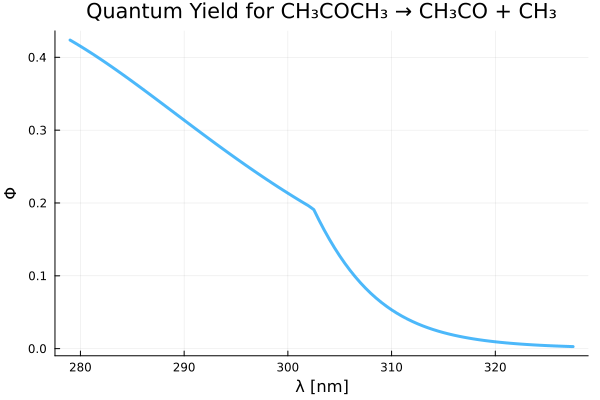

In [7]:
# λ = hr4000_df.λ
# Φ = zeros(size(λ))

# idxs = [idx for idx ∈ 1:size(λ,1) if λ[idx] ≥ 250.0 && λ[idx] ≤ 395.0 ]
# Φ[idxs] .= 1.0


p = plot(
    λ,
    Φ,
    xlabel="λ [nm]",
    ylabel="Φ",
    alpha=0.7,
    lw=3,
    label="",
    title="Quantum Yield for CH₃COCH₃ → CH₃CO + CH₃"
)